Mean Squared Error: 24428.90
                    Actual     Predicted
TimeReviewed                            
2019-02-03      537.789001    533.575920
2019-02-04     9042.851989   9092.748622
2019-02-05     6460.128996   6441.913995
2019-02-06    10759.650996  10799.435853
2019-02-07    11140.317008  11152.828071
...                    ...           ...
2019-05-10    15619.215017  16272.610727
2019-05-11     9179.519970   9177.693183
2019-05-12        0.000000      7.586290
2019-05-13    12396.665989  12395.545953
2019-05-14     6716.024996   6700.809617

[101 rows x 2 columns]


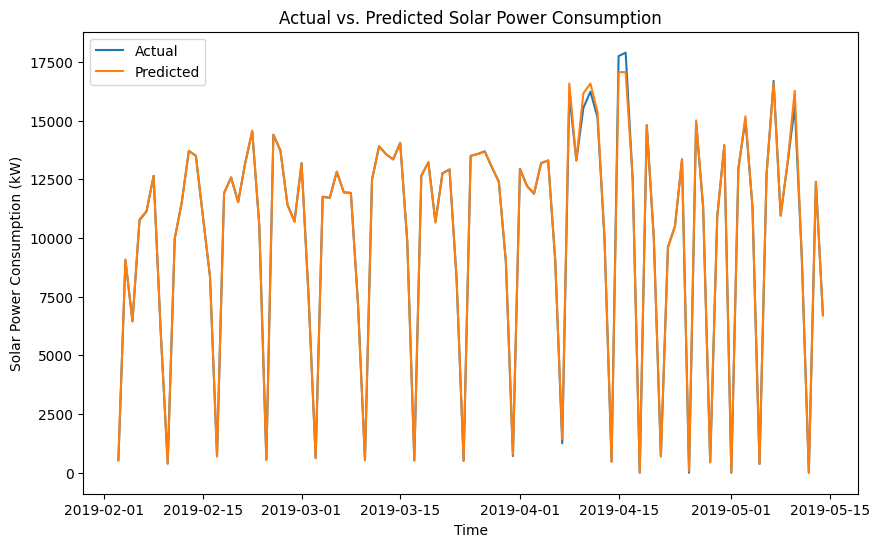

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('C:/Users/shaik/Downloads/dailyEnergyWithFeatures.csv')

# Convert the time column to datetime type
data['TimeReviewed'] = pd.to_datetime(data['TimeReviewed'])

# Set the time column as the index
data.set_index('TimeReviewed', inplace=True)

# Feature Engineering (if needed)
# For example, you can extract hour, day, month, etc. from the timestamp

# Define features and target variable
features = ['Solar_Power_Consumption(Kw)', 'Temp( C)', 'EmployeeCount']
target = 'Solar_Power_Consumption(Kw)'

# Split the dataset into training and testing sets
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Handle missing values
train_data = train_data.dropna()
test_data = test_data.dropna()

# Define the features and target for training
X_train = train_data[features]
y_train = train_data[target]

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Define the features for testing
X_test = test_data[features]

# Make predictions
predictions = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(test_data[target], predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Actual': test_data[target],
    'Predicted': predictions
})

# Display the DataFrame
print(results_df)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[target], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Solar Power Consumption (kW)')
plt.title('Actual vs. Predicted Solar Power Consumption')
plt.legend()
plt.show()
